# Task 1: import all necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

e:\conda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# load dataset

In [2]:
df = pd.read_csv("experiment.csv")
df


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


# Data pre processing

In [3]:
df.shape

(50000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

# Date time conversion

In [6]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: document_create_date.1, dtype: datetime64[ns]

In [7]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2020-02-11
1   2019-08-08
2   2019-12-30
3          NaT
4   2019-11-25
Name: clear_date, dtype: datetime64[ns]

In [8]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: posting_date, dtype: datetime64[ns]

In [9]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2020-02-10
1   2019-08-11
2   2019-09-29
3   2020-04-10
4   2019-11-28
Name: due_in_date, dtype: datetime64[ns]

In [10]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-31
4   2019-11-13
Name: baseline_create_date, dtype: datetime64[ns]

# looking at converted datatype

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

# dropping all column with null values

In [12]:
df.dropna(axis=1,how='all',inplace=True)
df.shape
# we dropped column area_business

(50000, 18)

In [13]:
df.clear_date.count()

40000

In [14]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

# Dropping null values in invoice id
## invoice id has only 49994 unique values of 50000. So let's analyse 

In [15]:
df["document type"].value_counts()


RV    49994
X2        6
Name: document type, dtype: int64

### We see that where the invoice id is missing the document type is X2 and posting date is different from document create date.
### Since their are only 6 values and invoice_id needs to be unique we can drop these rows

In [16]:
df.dropna(axis=0,subset=['invoice_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,2020-01-26,2020-02-10,USD,RV,1.0,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,2019-07-22,2019-08-11,USD,RV,1.0,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,2019-09-14,2019-09-29,USD,RV,1.0,2253.86,2019-09-14,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,20200330,2020-03-30,2020-04-10,CAD,RV,1.0,3299.70,2020-03-31,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,2019-11-13,2019-11-28,USD,RV,1.0,33133.29,2019-11-13,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,20200417,2020-04-21,2020-05-06,USD,RV,1.0,3187.86,2020-04-21,NAA8,1.930797e+09,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,20190814,2019-08-15,2019-08-30,USD,RV,1.0,6766.54,2019-08-15,NAH4,1.929744e+09,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,20200218,2020-02-19,2020-03-05,USD,RV,1.0,6120.86,2020-02-19,NAA8,1.930537e+09,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,20191126,2019-11-27,2019-12-12,USD,RV,1.0,63.48,2019-11-27,NAA8,1.930199e+09,0


# Check for unique values in each column

In [17]:
for cols in df.columns:   
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1424
name_customer - 4193
clear_date - 403
buisness_year - 2
doc_id - 48833
posting_date - 506
document_create_date - 507
document_create_date.1 - 506
due_in_date - 547
invoice_currency - 2
document type - 1
posting_id - 1
total_open_amount - 44344
baseline_create_date - 506
cust_payment_terms - 74
invoice_id - 48833
isOpen - 2


### There is only 1 unique value in document type and posting_id. We can drop these.

In [18]:
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'isOpen'],
      dtype='object')

# Now let's check for NULL values again.

In [19]:
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

There is No null(except clear-date) values so moving on to removing duplicate columns.

# Duplicate column removal

In [20]:
# function to find duplicate columns
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

## Using user-defined function.

In [21]:
dr=findDuplicateColumns(df)
dr

['posting_date', 'doc_id']

In [22]:
df.drop(columns=dr,inplace=True) 

# We dropped posting_date and doc_id.

##  Now, to avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1

In [23]:
df.drop(columns=['document_create_date'],inplace=True)

# Also, invoice id is unique for each transaction and don't affect the sales, so we drop it.

In [24]:
df.drop(columns=['invoice_id'],inplace=True) 
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200561861,CO corporation,NaT,2020.0,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,1
49990,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0
49991,U001,0200772595,SAFEW associates,2020-03-05,2020.0,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,0
49992,U001,0200726979,BJ'S llc,2019-12-12,2019.0,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0




# TARGET VARIABLE AND SORT

### Our model cant take in dates for prediction so our target column will not be clear_date. Instead it will be the delay column as delay will be in int format which our model can predict.

### clear_date - due_date will tell us how much delay was there in paying.

### "-" indicates it has been paid off before due date. "+" indicates it has been paid off after the due date

In [25]:
df['delay']=(df['clear_date']-df['due_in_date']).dt.days

In [26]:
df.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
43098,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
32817,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
44611,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
15510,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
1268,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
7528,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
48269,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
411,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


# SPLITTING

## Creating test set on null clear_date

In [27]:
test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1,NaN
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1,NaN
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1,NaN
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1,NaN
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1,NaN
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1,NaN
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1,NaN
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1,NaN


In [28]:
ts = test_data.copy()

# Splitting test_set into x_test and y_test

In [29]:
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: delay, Length: 10000, dtype: float64

In [30]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-02-27,2020-03-13,USD,32922.51,2020-02-27,NAH4,1
1,U001,0200806580,BE systems,NaT,2020.0,2020-02-27,2020-03-13,USD,4827.34,2020-02-27,NAA8,1
2,U001,0200769623,WAL-MAR trust,NaT,2020.0,2020-02-27,2020-03-13,USD,14706.47,2020-02-27,NAH4,1
3,U001,0200726979,BJ'S us,NaT,2020.0,2020-02-27,2020-03-13,USD,413.83,2020-02-27,NAA8,1
4,U001,0200014556,ALBER corporation,NaT,2020.0,2020-02-27,2020-05-02,USD,15651.65,2020-02-27,NAGD,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200541916,VF G corp,NaT,2020.0,2020-05-15,2020-05-30,USD,34301.32,2020-05-15,NAA8,1
9996,U001,0200759878,SA associates,NaT,2020.0,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH4,1
9997,U001,0200915438,GROC foundation,NaT,2020.0,2020-05-18,2020-06-02,USD,1232.00,2020-05-18,NAA8,1
9998,CA02,0100027744,OMEGA AD in,NaT,2020.0,2020-05-19,2020-05-19,CAD,7035.00,2020-05-19,CAB1,1


# Creating a seprate data frame out of which we will extract val1, val2 and final train set.

##  WHOLE DATA ---> [TRAIN_DATA + VAL1 (1.5 MONTHS) + VAL2 (1.5 MONTHS)] + TEST_DATA

In [31]:
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
39990,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
39991,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
39992,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


In [32]:
# Making use of offset to find date 1.5 months prior to 2020-02-27
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]
print(y) 
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y].last_valid_index()

2020-01-12 00:00:00


35838

This gives the date which is 1.5 months prior to 2020-02-27.

val2 will start from 2020-01-13 to 2020-02-27

In [33]:
# dataframe for val2
val2 = train_data2.iloc[35839: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200762301,C&S WH corp,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,8940.20,2020-01-13,NAC6,0,0.0
1,U001,0200729942,SA corporation,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,5396.01,2020-01-13,NAA8,0,0.0
2,CA02,0140105686,SYSC associates,2020-02-04,2020.0,2020-01-13,2020-02-01,CAD,25025.65,2020-01-22,CA10,0,3.0
3,U001,0200762301,C&S WH foundation,2020-01-28,2020.0,2020-01-13,2020-01-28,USD,15824.07,2020-01-13,NAC6,0,0.0
4,U001,0200769623,WAL-MAR foundation,2020-01-23,2020.0,2020-01-13,2020-01-28,USD,19688.89,2020-01-13,NAH4,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,U001,0200571849,US in,2020-03-11,2020.0,2020-02-26,2020-03-12,USD,44450.82,2020-02-26,NAA8,0,-1.0
4151,U001,0200769623,WAL-MAR associates,2020-03-09,2020.0,2020-02-26,2020-03-12,USD,67471.47,2020-02-26,NAH4,0,-3.0
4152,U001,0200418007,AM associates,2020-03-19,2020.0,2020-02-27,2020-03-13,USD,10349.36,2020-02-27,NAA8,0,6.0
4153,U001,0200759878,SA corp,2020-03-13,2020.0,2020-02-27,2020-03-13,USD,49290.19,2020-02-27,NAH4,0,0.0


## Removing val2 from train_data2 and storing into new dataframe to extract val1.

In [34]:
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35834,U001,0200759878,SA us,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,13891.02,2020-01-12,NAH4,0,1.0
35835,U001,0200769623,WAL-MAR trust,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,21795.65,2020-01-12,NAH4,0,-4.0
35836,U001,0200769623,WAL-MAR co,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,826.01,2020-01-12,NAH4,0,-4.0
35837,U001,0200762301,C&S WH,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,85097.42,2020-01-12,NAC6,0,1.0


In [35]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index() 

2019-11-27 00:00:00


32958

This gives the date which is 1.5 months prior to 2020-01-13 (start of val2).

val1 will start from 2019-11-28 to 2020-01-12.

In [36]:
val1 = train_data1.iloc[37251: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay


# Removing val1 from the dataframe and making the final train set.

In [37]:
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,14559.00,2018-12-30,NAH4,0,-5.0
1,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
2,U001,0200726979,BJ'S systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,58.18,2018-12-30,NAA8,0,1.0
3,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,4890.99,2018-12-30,NAH4,0,-5.0
4,U001,0200769623,WAL-MAR associates,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,9785.88,2018-12-30,NAH4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35834,U001,0200759878,SA us,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,13891.02,2020-01-12,NAH4,0,1.0
35835,U001,0200769623,WAL-MAR trust,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,21795.65,2020-01-12,NAH4,0,-4.0
35836,U001,0200769623,WAL-MAR co,2020-01-23,2020.0,2020-01-12,2020-01-27,USD,826.01,2020-01-12,NAH4,0,-4.0
35837,U001,0200762301,C&S WH,2020-01-28,2020.0,2020-01-12,2020-01-27,USD,85097.42,2020-01-12,NAC6,0,1.0


## We successfully splitted the data into train, val1, val2, and test set.

# EDA on train set
# UNIVARIATE ANALYSIS

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34303 entries, 0 to 35838
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           34303 non-null  object        
 1   cust_number             34303 non-null  object        
 2   name_customer           34303 non-null  object        
 3   clear_date              34303 non-null  datetime64[ns]
 4   buisness_year           34303 non-null  float64       
 5   document_create_date.1  34303 non-null  datetime64[ns]
 6   due_in_date             34303 non-null  datetime64[ns]
 7   invoice_currency        34303 non-null  object        
 8   total_open_amount       34303 non-null  float64       
 9   baseline_create_date    34303 non-null  datetime64[ns]
 10  cust_payment_terms      34303 non-null  object        
 11  isOpen                  34303 non-null  int64         
 12  delay                   34303 non-null  float6

### We can see there are no null values in our dataset. There are only 3 continuous variable column i.e. buisness_year, total_open_amount and delay,

# business_code
## company code of the account

In [39]:
train_data.business_code.value_counts()

U001    30978
CA02     2773
U013      436
U002      105
U005        9
U007        2
Name: business_code, dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='count'>

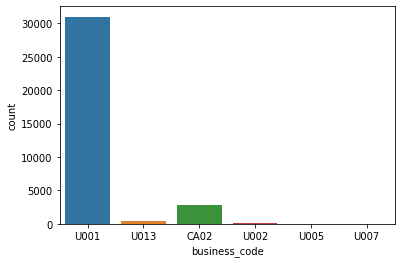

In [40]:
sns.countplot(x = train_data['business_code'])

### As there are only 6 values we can apply encoding on it later.

# cust_number
## customer number given to all the customers of the Account.

In [41]:
train_data.cust_number.value_counts()

0200769623    7627
0200726979    1259
0200762301    1017
0200759878     895
0200794332     757
              ... 
100000217        1
200879892        1
0200232199       1
0100047471       1
0100053554       1
Name: cust_number, Length: 1294, dtype: int64

In [42]:
len(dict(train_data.cust_number.value_counts()))

1294

## There are 1294 unique customers or comapny that we have transactions with.

cust_number represent account no of different companies.
For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR systems etc but they have the same cust_number.

### name_customer
name of the customer.

In [43]:
train_data.name_customer.value_counts()

WAL-MAR trust          815
WAL-MAR                781
WAL-MAR in             775
WAL-MAR corp           769
WAL-MAR corporation    767
                      ... 
AGR associates           1
UTZ Q systems            1
WINKLE                   1
MITC associates          1
SUGARP corporation       1
Name: name_customer, Length: 3660, dtype: int64

### Companies Like WAL-MAR, WAL-MAR systems,etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

## clear_date
The date on which the customer clears an invoice, or in simple terms, they make the full payment.

In [44]:
train_data.clear_date.min()

Timestamp('2019-01-03 00:00:00')

In [45]:
train_data.clear_date.max()

Timestamp('2020-05-21 00:00:00')

### Our clear_date ranges for 362 days.

In [46]:
clear_month = train_data.clear_date.dt.month
clear_month.value_counts()

5     3252
12    3072
4     3048
10    3008
11    2981
8     2944
7     2927
3     2863
9     2798
6     2679
2     2456
1     2275
Name: clear_date, dtype: int64

<AxesSubplot:xlabel='clear_date', ylabel='count'>

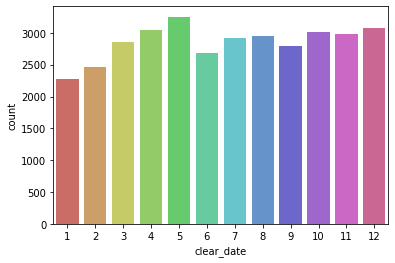

In [47]:
sns.countplot(x=clear_month, palette="hls")

### May is the month where the companies completed their maximum transations.

# buisness_year
indicates the year of clear date

In [48]:
train_data.buisness_year.value_counts()

2019.0    33217
2020.0     1086
Name: buisness_year, dtype: int64

### As there is only 2 buisness_year we will drop this column.

# document_create_date.1
The date on which the invoice document was created

In [49]:
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [50]:
train_data["document_create_date.1"].max()

Timestamp('2020-01-12 00:00:00')

It ranges for 347 days, almost less than a year

# invoice_currency
The currency of the invoice amount in the document for the invoice

In [51]:
train_data["invoice_currency"].value_counts()

USD    31528
CAD     2775
Name: invoice_currency, dtype: int64

### As there are two currencies involved, we can convert either one them. However, as there is not much difference between USD and CAD, there is not much use of converting them.

## total_open_amount
The amount that is yet to be paid for that invoice

In [52]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))

count     34303.000000
mean      32216.476408
std       39988.420487
min           0.790000
25%        4674.180000
50%       17275.620000
75%       46612.795000
max      668593.360000
Name: total_open_amount, dtype: object

### Automatically binning the amount using pd.qcut.

In [53]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(0.789, 813.21]           3438
(6955.912, 12765.66]      3432
(82117.52, 668593.36]     3431
(2917.482, 6955.912]      3430
(17275.62, 25472.132]     3430
(25472.132, 39378.432]    3430
(39378.432, 55020.062]    3430
(55020.062, 82117.52]     3430
(12765.66, 17275.62]      3429
(813.21, 2917.482]        3423
Name: total_open_amount, dtype: int64

In [54]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

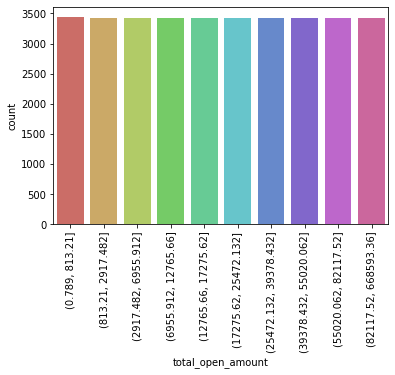

In [55]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

### The number of companies in each distribution is same.

# baseline_create_date
The date on which the Invoice was created.

In [56]:
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
30,CA02,0140106181,THE corp,2019-05-01,2019.0,2018-12-30,2019-01-10,CAD,117723.35,2018-12-31,CA10,0,111.0
92,CA02,0140104423,METRO,2019-01-18,2019.0,2018-12-31,2019-01-12,CAD,71231.97,2019-01-02,CA10,0,6.0
127,CA02,0140104340,COLABOR systems,2019-01-17,2019.0,2018-12-31,2019-01-13,CAD,1824.47,2019-01-03,CA10,0,4.0
167,CA02,0140105785,SHOPPE trust,2019-01-25,2019.0,2019-01-02,2019-01-21,CAD,45710.70,2019-01-11,CA10,0,4.0
169,CA02,0140104409,LOB corp,2019-01-18,2019.0,2019-01-02,2019-01-14,CAD,259891.02,2019-01-04,CA10,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35776,CA02,140104423,METRO associates,2020-01-21,2020.0,2020-01-11,2020-01-23,CAD,173200.67,2020-01-13,CA10,0,-2.0
35786,CA02,0140106408,WAL-M co,2020-01-29,2020.0,2020-01-11,2020-01-22,CAD,5679.60,2020-01-12,CA10,0,7.0
35823,CA02,0140104409,LOB co,2020-01-31,2020.0,2020-01-12,2020-01-31,CAD,88433.88,2020-01-21,CA10,0,0.0
35826,CA02,0140104429,COSTCO,2020-02-05,2020.0,2020-01-12,2020-01-31,CAD,13167.54,2020-01-21,CA10,0,5.0


### Baseline create date and document create date are same except if the company is canadian there is a delay in filing the document and creating an invoice.

It's not that important to our model so we'll drop it.

# cust_payment_terms
Business terms and agreements between customers and accounts on discounts and days of payment.

In [57]:
train_data.cust_payment_terms.value_counts()

NAA8    13705
NAH4     9104
CA10     2684
NAC6     1150
NAM4      935
        ...  
NATV        1
NATK        1
NAUY        1
NAD8        1
CA60        1
Name: cust_payment_terms, Length: 69, dtype: int64

In [58]:
len(dict(train_data.cust_number.value_counts()))

1294

It is same as cust_number.

# isOpen
Tells whether a transaction is open or closed

In [59]:
train_data.isOpen.value_counts()

0    34303
Name: isOpen, dtype: int64

### isOpen is 0 for all the train set as all the invoices has been closed. So we can drop this column.

# Delay
The negative delay specifies that the amount was cleared before the due date and thus there was no delay. Therefore we have capped the negative values to 0.

In [60]:
train_data.delay[train_data.delay<0].count()

12624

In [61]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [62]:
train_data.delay.describe()

count    34303.000000
mean         2.730519
std          9.226519
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        204.000000
Name: delay, dtype: float64

# MULTIVARIATE ANALYSIS
Relation b/w business_code with invoice_currency

In [63]:
train_data['invoice_currency'].value_counts()

USD    31528
CAD     2775
Name: invoice_currency, dtype: int64

In [64]:
train_data.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  2773
U001           USD                 30978
U002           USD                   105
U005           USD                     9
U007           USD                     2
U013           USD                   434
               CAD                     2
Name: invoice_currency, dtype: int64

### We see that business code first letter describes in which currency the transaction took place except for 2 entries. Let's explore them further

In [65]:
train_data.groupby("invoice_currency").business_code.value_counts()

invoice_currency  business_code
CAD               CA02              2773
                  U013                 2
USD               U001             30978
                  U013               434
                  U002               105
                  U005                 9
                  U007                 2
Name: business_code, dtype: int64

### business_code U013 is an US based company but paying in CAD

In [66]:
temp = train_data.loc[train_data['business_code'] == 'U013']
temp.loc[temp['invoice_currency']=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
704,U013,0100052318,PRATT' systems,2019-02-23,2019.0,2019-01-08,2019-02-07,CAD,3880.79,2019-01-08,NAVE,0,16.0
32790,U013,0100052318,PRATT' co,2019-12-24,2019.0,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


## We see that only PRATT company is the only US based company paying in CAD.

## Morever they are only 2 transactions so it's not as significant. They don't even have any delay so this won't affect our model.

# Relation between total_open_amount and delay

In [67]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",2925,94,84,75,95
"(5000, 10000]",1334,58,63,41,24
"(10000, 50000]",5600,251,153,97,60
"(50000, 100000]",2284,45,16,9,12
"(100000, 1100000]",1084,16,15,7,4


<AxesSubplot:xlabel='total_open_amount', ylabel='count'>

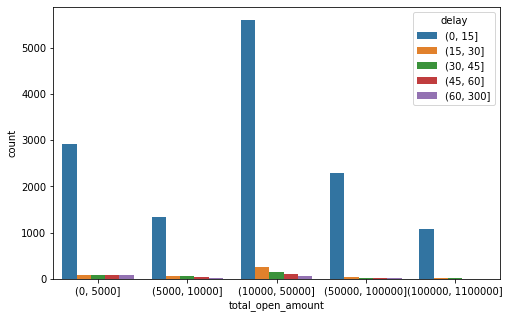

In [68]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

### As we can see from the graph for each bucket the amount was returned in 0-15 delay days.

In [69]:
train_data.corr()

,buisness_year,total_open_amount,isOpen,delay
buisness_year,1.000000,-0.005604,NaN,0.016830
total_open_amount,-0.005604,1.000000,NaN,-0.044017
isOpen,NaN,NaN,NaN,NaN
delay,0.016830,-0.044017,NaN,1.000000


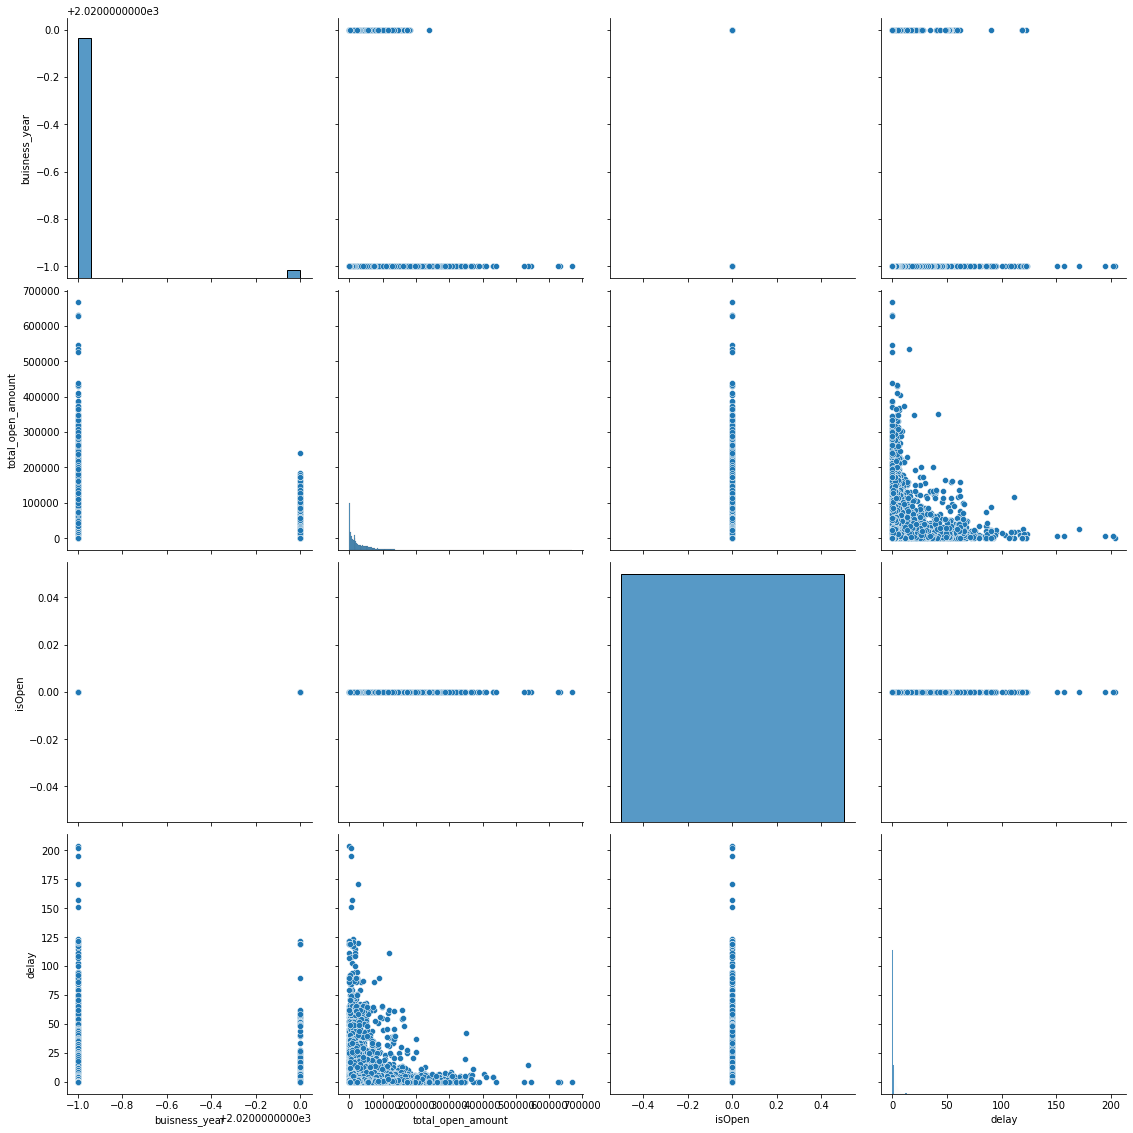

In [70]:
sns.pairplot(train_data, height=4)

### We can infer: The total open amount decreses as the delay increases. There is negative co-relation.

# FEATURE ENGINEERING

In [71]:
train_data.drop(columns=['business_code', 'name_customer','buisness_year','invoice_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0
...,...,...,...,...,...,...
35834,0200759878,2020-01-28,2020-01-12,2020-01-27,13891.02,1.0
35835,0200769623,2020-01-23,2020-01-12,2020-01-27,21795.65,0.0
35836,0200769623,2020-01-23,2020-01-12,2020-01-27,826.01,0.0
35837,0200762301,2020-01-28,2020-01-12,2020-01-27,85097.42,1.0


### Extracting day and month from document_create_date.1 and due_in_date.

In [72]:
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [73]:
train_data

,cust_number,clear_date,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,2019-01-09,2018-12-30,2019-01-14,14559.00,0.0,30,12,14,1
1,0200769623,2019-01-09,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
2,0200726979,2019-01-15,2018-12-30,2019-01-14,58.18,1.0,30,12,14,1
3,0200769623,2019-01-09,2018-12-30,2019-01-14,4890.99,0.0,30,12,14,1
4,0200769623,2019-01-15,2018-12-30,2019-01-14,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...
35834,0200759878,2020-01-28,2020-01-12,2020-01-27,13891.02,1.0,12,1,27,1
35835,0200769623,2020-01-23,2020-01-12,2020-01-27,21795.65,0.0,12,1,27,1
35836,0200769623,2020-01-23,2020-01-12,2020-01-27,826.01,0.0,12,1,27,1
35837,0200762301,2020-01-28,2020-01-12,2020-01-27,85097.42,1.0,12,1,27,1


In [74]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,0200769623,14559.00,0.0,30,12,14,1
1,0200769623,25749.68,0.0,30,12,14,1
2,0200726979,58.18,1.0,30,12,14,1
3,0200769623,4890.99,0.0,30,12,14,1
4,0200769623,9785.88,1.0,30,12,14,1
...,...,...,...,...,...,...,...
35834,0200759878,13891.02,1.0,12,1,27,1
35835,0200769623,21795.65,0.0,12,1,27,1
35836,0200769623,826.01,0.0,12,1,27,1
35837,0200762301,85097.42,1.0,12,1,27,1


### Extracting the integer part from cust_number



In [75]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,0.0,30,12,14,1,0200769623
1,25749.68,0.0,30,12,14,1,0200769623
2,58.18,1.0,30,12,14,1,0200726979
3,4890.99,0.0,30,12,14,1,0200769623
4,9785.88,1.0,30,12,14,1,0200769623
...,...,...,...,...,...,...,...
35834,13891.02,1.0,12,1,27,1,0200759878
35835,21795.65,0.0,12,1,27,1,0200769623
35836,826.01,0.0,12,1,27,1,0200769623
35837,85097.42,1.0,12,1,27,1,0200762301


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34303 entries, 0 to 35838
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  34303 non-null  float64
 1   delay              34303 non-null  float64
 2   doc_create_day     34303 non-null  int64  
 3   doc_create_month   34303 non-null  int64  
 4   due_day            34303 non-null  int64  
 5   due_month          34303 non-null  int64  
 6   cn                 34303 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.1+ MB


### Converting the data-type of cn as float

In [77]:
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34303 entries, 0 to 35838
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  34303 non-null  float64
 1   delay              34303 non-null  float64
 2   doc_create_day     34303 non-null  int64  
 3   doc_create_month   34303 non-null  int64  
 4   due_day            34303 non-null  int64  
 5   due_month          34303 non-null  int64  
 6   cn                 34303 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 3.1 MB


## Splitting into x_train and y_train

In [78]:
y_train = train_data['delay']
y_train

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
35834    1.0
35835    0.0
35836    0.0
35837    1.0
35838    0.0
Name: delay, Length: 34303, dtype: float64

In [79]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,14559.00,30,12,14,1,200769623.0
1,25749.68,30,12,14,1,200769623.0
2,58.18,30,12,14,1,200726979.0
3,4890.99,30,12,14,1,200769623.0
4,9785.88,30,12,14,1,200769623.0
...,...,...,...,...,...,...
35834,13891.02,12,1,27,1,200759878.0
35835,21795.65,12,1,27,1,200769623.0
35836,826.01,12,1,27,1,200769623.0
35837,85097.42,12,1,27,1,200762301.0


### Now we need to repeat the same process on val1, val2 and x_test.

In [80]:
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           0 non-null      object        
 1   cust_number             0 non-null      object        
 2   name_customer           0 non-null      object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           0 non-null      float64       
 5   document_create_date.1  0 non-null      datetime64[ns]
 6   due_in_date             0 non-null      datetime64[ns]
 7   invoice_currency        0 non-null      object        
 8   total_open_amount       0 non-null      float64       
 9   baseline_create_date    0 non-null      datetime64[ns]
 10  cust_payment_terms      0 non-null      object        
 11  isOpen                  0 non-null      int64         
 12  delay                   0 non-null      float64       
dtypes:

In [81]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val1

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn


In [82]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  0 non-null      float64
 1   delay              0 non-null      float64
 2   doc_create_day     0 non-null      int64  
 3   doc_create_month   0 non-null      int64  
 4   due_day            0 non-null      int64  
 5   due_month          0 non-null      int64  
 6   cn                 0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 124.0 bytes


### Splitting into x_val and y_val

In [83]:
y_val1 = val1['delay']
y_val1

Series([], Name: delay, dtype: float64)

In [84]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn


In [85]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,8940.20,0.0,13,1,28,1,0200762301
1,5396.01,0.0,13,1,28,1,0200729942
2,25025.65,3.0,13,1,1,2,0140105686
3,15824.07,0.0,13,1,28,1,0200762301
4,19688.89,0.0,13,1,28,1,0200769623
...,...,...,...,...,...,...,...
4150,44450.82,0.0,26,2,12,3,0200571849
4151,67471.47,0.0,26,2,12,3,0200769623
4152,10349.36,6.0,27,2,13,3,0200418007
4153,49290.19,0.0,27,2,13,3,0200759878


In [86]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  4155 non-null   float64
 1   delay              4155 non-null   float64
 2   doc_create_day     4155 non-null   int64  
 3   doc_create_month   4155 non-null   int64  
 4   due_day            4155 non-null   int64  
 5   due_month          4155 non-null   int64  
 6   cn                 4155 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 227.4 KB


In [87]:
y_val2 = val2['delay']
y_val2

0       0.0
1       0.0
2       3.0
3       0.0
4       0.0
       ... 
4150    0.0
4151    0.0
4152    6.0
4153    0.0
4154    3.0
Name: delay, Length: 4155, dtype: float64

In [88]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,8940.20,13,1,28,1,200762301.0
1,5396.01,13,1,28,1,200729942.0
2,25025.65,13,1,1,2,140105686.0
3,15824.07,13,1,28,1,200762301.0
4,19688.89,13,1,28,1,200769623.0
...,...,...,...,...,...,...
4150,44450.82,26,2,12,3,200571849.0
4151,67471.47,26,2,12,3,200769623.0
4152,10349.36,27,2,13,3,200418007.0
4153,49290.19,27,2,13,3,200759878.0


In [89]:
x_test.drop(['business_code', 'name_customer', 'clear_date', 'buisness_year', 'invoice_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,32922.51,27,2,13,3,0200769623
1,4827.34,27,2,13,3,0200806580
2,14706.47,27,2,13,3,0200769623
3,413.83,27,2,13,3,0200726979
4,15651.65,27,2,2,5,0200014556
...,...,...,...,...,...,...
9995,34301.32,15,5,30,5,0200541916
9996,22835.50,17,5,1,6,0200759878
9997,1232.00,18,5,2,6,0200915438
9998,7035.00,19,5,19,5,0100027744


In [90]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_open_amount  10000 non-null  float64
 1   doc_create_day     10000 non-null  int64  
 2   doc_create_month   10000 non-null  int64  
 3   due_day            10000 non-null  int64  
 4   due_month          10000 non-null  int64  
 5   cn                 10000 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


# FEATURE SELECTION

<AxesSubplot:>

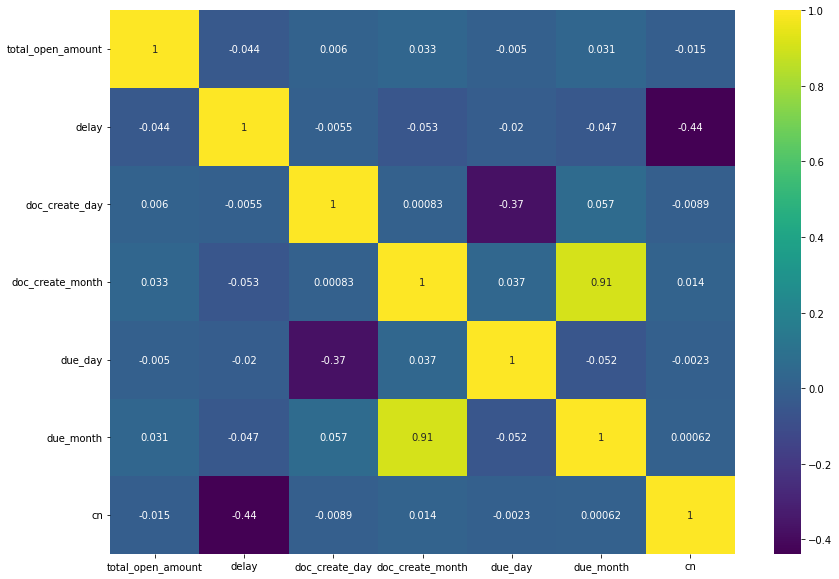

In [91]:
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

### As we can see from the above graph due_month and doc_create_month are highly correlated and thus they will have a negative impact on our model. So drop remove due_month.

In [92]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

# MODELING
## As this is a regression model we will use the following models:-

## Linear Regressor
## SVR
## Decision Tree
## Random Forest
## XgBoost

# XGBoost

# Random Forest

In [93]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)



RandomForestRegressor()

In [94]:
# Predicting the Validation Set Results
predicted2 = clf2.predict(x_val2)

In [95]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted2), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted2), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted2), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted2), 2))
print("Accuracy= ", clf2.score(x_val2,y_val2))

Mean absolute error = 2.77
Mean squared error = 41.86
Median absolute error = 1.22
Explain variance score = 0.33
R2 score = 0.31
Accuracy=  0.30776177512000213


# DecisionTreeRegressor

In [96]:
# Fitting Decision Tree Regressor to the Training Set
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted3 = clf3.predict(x_val2)

In [97]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted3), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted3), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted3), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted3), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted3), 2))
print("Accuracy= ", clf3.score(x_val2,y_val2))


Mean absolute error = 3.18
Mean squared error = 108.75
Median absolute error = 1.0
Explain variance score = -0.78
R2 score = -0.8
Accuracy=  -0.7984305129473197


# LinearRegression

In [98]:
# Fitting Simple Linear Regression to the Training Set
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

# Predicting the Test Set Results
predicted5 = clf5.predict(x_val2)

In [99]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted5), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted5), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted5), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted5), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted5), 2))
print("Accuracy= ", clf5.score(x_val2,y_val2))

Mean absolute error = 3.29
Mean squared error = 49.71
Median absolute error = 1.85
Explain variance score = 0.19
R2 score = 0.18
Accuracy=  0.1780086436251317


## We'll continue with XgBoost as it gives us the best result from all the other models.
# HYPER-PARAMETER TUNING

In [100]:
# now we will hypertune our parameters for better and accurate results and avoiding overfitting

# we will set some parameter
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## In this we will fit and check for best parameters for our model using RandomizedSearchCV

In [101]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [102]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


e:\conda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

##### Checking for best parameters.

In [103]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Using these parameters and checking against val2

In [104]:
cl = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
cl.fit(x_train, y_train)
# Predicting the Test Set Results
predicted = cl.predict(x_val2)

In [105]:
predicted = cl.predict(x_val2)

In [106]:
# predicting all types of error and accuracy

print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_val2, predicted), 2))
print("Accuracy= ", cl.score(x_val2,y_val2))

Mean absolute error = 2.42
Mean squared error = 30.68
Median absolute error = 1.24
Explain variance score = 0.5
R2 score = 0.49
Accuracy=  0.4927314701972232


e:\conda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# TEST

In [107]:
predicted1 = cl.predict(x_test)

e:\conda\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [108]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([ 1,  1,  1, ...,  1,  2, 50])

In [109]:
len(predicted1)

10000

#### We got the delay on test set.

In [127]:
Col=pd.DataFrame()

#### Appending the delay predicted column in it

In [2]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col

NameError: name 'predicted1' is not defined

## Predicting the clear date

In [ ]:
Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col

# Creating the Aging Bucket

In [ ]:
aging_bucket = []
for x in predicted1:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

In [113]:
!pip install xgboost